<a href="https://colab.research.google.com/github/nadinne94/projeto_estastitica_freq_medidas/blob/main/Estatistica_freq_med.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados

In [ ]:
df_enem = pd.read_json('enem_2023.json')
df_enem

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem
...,...,...,...,...,...,...
995,455.479216,557.756326,511.347833,510.358766,NaN,Homem
996,457.755594,444.616952,542.028624,419.689692,715.984249,Mulher
997,551.173161,568.769704,508.034658,NaN,798.408655,Homem
998,495.804002,522.125008,414.167228,451.696456,593.392939,Homem


In [ ]:
df_enem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


# Resolução

## 1. Qual das disciplinas tem a maior amplitude de nota?

In [ ]:
# range = df_enem.max() - df_enem.min()
# range
# TypeError: unsupported operand type(s) for -: 'str' and 'str'

agrupei apenas as colunas numericas, pois por ter a coluna object, a equação range não poderia ser aplicada aos dados 'str'

In [ ]:
# Filtrar apenas as colunas numéricas
numeric_columns = df_enem.select_dtypes(include=['number'])

In [ ]:
# calcular amplitude
range = numeric_columns.max() - numeric_columns.min()

In [ ]:
# Apresentar máx, min e a amplitude de cada coluna
result = pd.DataFrame({
    'Máximo': numeric_columns.max(),
    'Mínimo': numeric_columns.min(),
    'Amplitude': range
})
result

,Máximo,Mínimo,Amplitude
Linguagens,804.456317,287.000000,517.456317
Ciências humanas,763.919695,289.900000,474.019695
Ciências da natureza,802.004568,314.400000,487.604568
Matemática,807.877902,319.800000,488.077902
Redação,1000.000000,270.839965,729.160035


In [ ]:
# disciplina com maior amplitude de nota
print("A disciplina com maior amplitude de nota foi:", result['Amplitude'].idxmax())

A disciplina com maior amplitude de nota foi: Redação


## 2. Qual é a média e a mediana para cada uma das disciplinas?(Lembre-se de remover todos os valores nulos quando considerar a mediana)

### Média

In [ ]:
# calculo da média
media = numeric_columns.mean()
media

Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

### Mediana

In [ ]:
# removendo valores nulos
valores_nao_nulos = numeric_columns.dropna()

In [ ]:
# calculo da mediana considerando apenas não nulos
mediana = valores_nao_nulos.median()
mediana

Linguagens              517.128831
Ciências humanas        528.503263
Ciências da natureza    502.935209
Matemática              532.961486
Redação                 639.602691
dtype: float64

### Apresentando a media e a mediana de cada coluna

In [ ]:
pd.DataFrame({
    'Média': media,
    'Mediana': mediana
})

,Média,Mediana
Linguagens,514.524809,517.128831
Ciências humanas,527.042281,528.503263
Ciências da natureza,499.315583,502.935209
Matemática,535.965660,532.961486
Redação,637.783532,639.602691


## 3. Considerando o curso de Ciência da Computação da UFPE, onde o peso de cada uma das disciplinas é ponderado:
- a. Redação: 2
- b. Matemática e suas Tecnologias: 4
- c. Linguagens, Códigos e suas Tecnologias: 2
- d. Ciências Humanas e suas Tecnologias: 1
- e. Ciências da Natureza e suas Tecnologias: 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?

### Dicionário com os pesos equivalentes a cada disciplina

In [ ]:
# vamos criar um dicionário com os pesos rescpectivos a cada matéria
pesos = {'Redação': 2,
         'Matemática': 4,
         'Linguagens': 2,
         'Ciências da natureza': 1,
         'Ciências humanas': 1
         }

### Novo df para armazenar as notas aplicando os pesos

In [ ]:
# Criar um novo DataFrame para armazer as notas aplicando os pesos
df_cienc_comp = df_enem.copy()

# iteraração multiplicando o valor de cada coluna pelo seu peso correspondente
for disciplina, peso in pesos.items():
    df_cienc_comp[disciplina] *= peso

In [ ]:
df_cienc_comp

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,1171.338599,686.512178,390.482473,1809.125330,1092.743412,Homem
1,718.769216,642.084134,NaN,1648.820827,1483.650511,Mulher
2,1245.464768,495.510719,443.183580,2678.733603,1369.031501,Homem
3,700.329209,602.041588,413.979810,2706.435806,1342.474229,Homem
4,768.187315,489.249140,609.758123,2081.706791,1488.750095,Homem
...,...,...,...,...,...,...
995,910.958433,557.756326,511.347833,2041.435063,NaN,Homem
996,915.511188,444.616952,542.028624,1678.758767,1431.968499,Mulher
997,1102.346323,568.769704,508.034658,NaN,1596.817310,Homem
998,991.608004,522.125008,414.167228,1806.785823,1186.785879,Homem


### Selecionando as 500 maiores notas

1 º Passo: Para selecionar as 500 maiores notas, somamos a nota de cada disciplina e armazenamos em uma nova coluna chamada 'Total'

In [ ]:
# Criando uma nova coluna para armazenar a nota total de cada aluno
df_cienc_comp['Total'] = df_cienc_comp.select_dtypes(include=['number']).sum(axis=1)

In [ ]:
df_cienc_comp

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Total
0,1171.338599,686.512178,390.482473,1809.125330,1092.743412,Homem,5150.201992
1,718.769216,642.084134,NaN,1648.820827,1483.650511,Mulher,4493.324688
2,1245.464768,495.510719,443.183580,2678.733603,1369.031501,Homem,6231.924171
3,700.329209,602.041588,413.979810,2706.435806,1342.474229,Homem,5765.260643
4,768.187315,489.249140,609.758123,2081.706791,1488.750095,Homem,5437.651463
...,...,...,...,...,...,...,...
995,910.958433,557.756326,511.347833,2041.435063,NaN,Homem,4021.497655
996,915.511188,444.616952,542.028624,1678.758767,1431.968499,Mulher,5012.884029
997,1102.346323,568.769704,508.034658,NaN,1596.817310,Homem,3775.967994
998,991.608004,522.125008,414.167228,1806.785823,1186.785879,Homem,4921.471941


2º Passo: Dispor o novo df com os valores coluna 'Total' em ordem decrescente  e selecionar apenas as 500 maiores notas

In [ ]:
# armazena o conjunto de dados considerando as 500 maiores notas
top_500 = df_cienc_comp.sort_values('Total', ascending=False).head(500)

In [ ]:
top_500

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Total
25,1209.650911,447.532353,523.041011,2908.724897,1740.928154,Mulher,6829.877324
824,1067.624758,611.760520,494.994598,3231.511608,1395.140426,Não idenficado,6801.031909
702,1102.796223,637.818208,451.624683,3215.079752,1305.339272,Homem,6712.658138
129,1166.030908,434.261543,588.516699,2750.486846,1704.547641,Mulher,6643.843636
60,996.789320,668.355060,457.371963,3040.544602,1422.916962,Mulher,6585.977907
...,...,...,...,...,...,...,...
456,995.674412,502.975922,451.586088,2109.976295,1041.757758,Mulher,5101.970475
297,1166.520883,465.428564,664.065434,1444.843037,1357.662129,Mulher,5098.520048
259,1177.865445,494.175399,NaN,1665.177260,1758.847509,Mulher,5096.065613
750,977.985667,551.149739,NaN,1934.418168,1632.112765,Homem,5095.666339


### Cálculo da média ponderada

In [ ]:
# media das notas considerando os pesos
top500_media = top_500['Total'].mean()
top500_media

5618.7910649038495

In [ ]:
# media ponderada do curso

# media de cada aluno considerando os pesos
media_ponderada = top_500['Total']/sum(pesos.values())

# sabendo a média de cada aluno, podemos calcular a média do curso
top500_media_ponderada = media_ponderada.mean()
print(top500_media_ponderada)

# forma direta
print((top_500['Total'].sum())/(sum(pesos.values()) * len(top_500)))


561.879106490385
561.879106490385


### Cálculo do desvio padrão

In [ ]:
desvio_padrao_total = top_500['Total'].std()
desvio_padrao_total

359.94266397324276

## 4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

Para determinar os alunos que iriam entrar, vamos selecionar as 40 maiores notas

In [ ]:
# 40 maiores notas
top_40 = df_cienc_comp.sort_values('Total', ascending=False).head(40)
top_40

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Total
25,1209.650911,447.532353,523.041011,2908.724897,1740.928154,Mulher,6829.877324
824,1067.624758,611.760520,494.994598,3231.511608,1395.140426,Não idenficado,6801.031909
702,1102.796223,637.818208,451.624683,3215.079752,1305.339272,Homem,6712.658138
129,1166.030908,434.261543,588.516699,2750.486846,1704.547641,Mulher,6643.843636
60,996.789320,668.355060,457.371963,3040.544602,1422.916962,Mulher,6585.977907
880,1343.048532,590.780179,546.595272,2286.429349,1818.759868,Homem,6585.613200
376,728.192084,582.024626,523.764760,2999.650484,1744.377480,Não idenficado,6578.009433
989,924.103426,512.986241,506.405210,3151.086690,1385.629346,Homem,6480.210912
694,994.987759,609.839007,528.413513,2948.700114,1387.478085,Mulher,6469.418478
965,1321.827789,613.882660,433.935910,2323.632328,1762.931764,Mulher,6456.210450


In [ ]:
# Variancia
variancia = top_40['Total'].std() ** 2
variancia

29576.75036004102

In [ ]:
# Media
media = top_40['Total'].mean()
media

6366.827415075188

In [ ]:
# media considerando os pesos
top_40['Total'].sum()/(len(top_40) * sum(pesos.values()))

636.6827415075187

## 5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [ ]:
# O teto do terceiro quartil é o próprio 3º quartil, portanto 75%
q3 = df_enem[['Matemática', 'Linguagens']].quantile(0.75)
q3

Matemática    592.912963
Linguagens    571.635876
Name: 0.75, dtype: float64

## 6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas assimétricos. Justifique e classifique, senão, assimétricas?

In [ ]:
from scipy.stats import skew

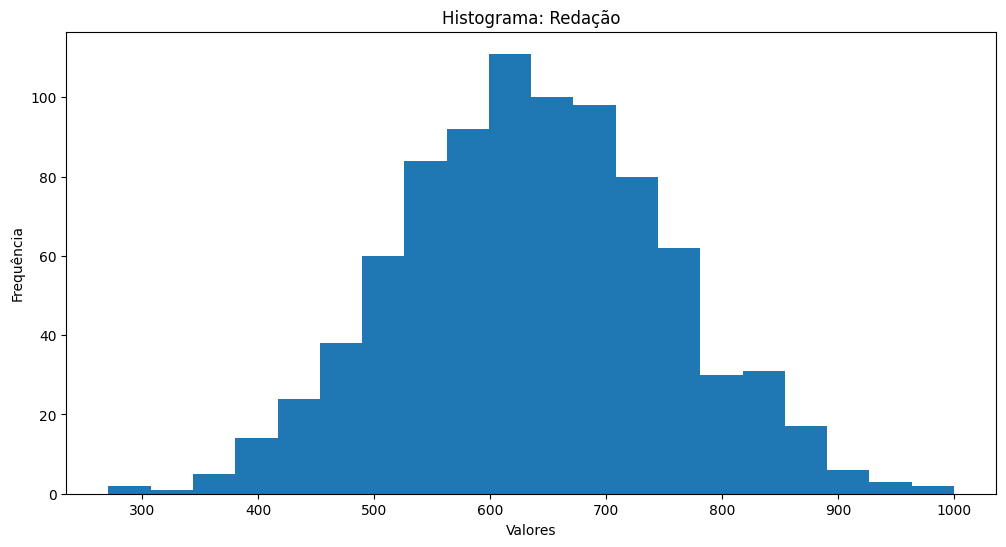

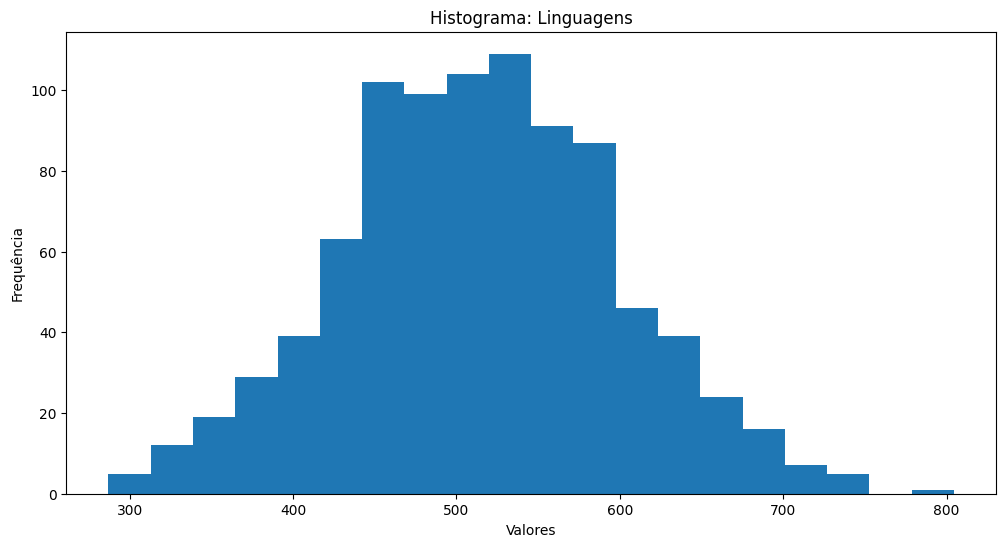

In [ ]:
dados = df_enem[['Redação','Linguagens']]

for disciplina in dados:
  plt.figure(figsize = (12, 6))
  plt.hist(dados[disciplina], bins=20)
  plt.title(f'Histograma: {disciplina}')
  plt.xlabel('Valores')
  plt.ylabel('Frequência')
  plt.show()

<Figure size 800x1000 with 0 Axes>

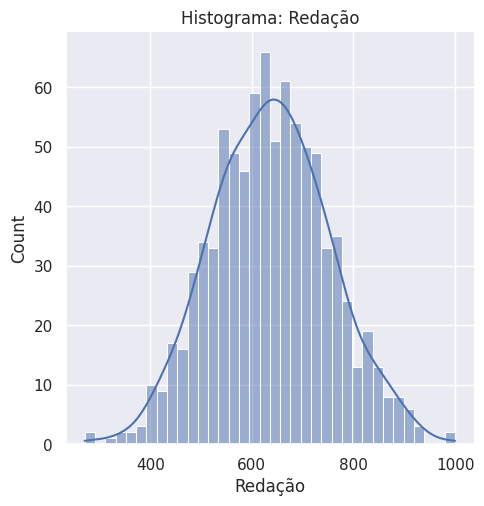

<Figure size 800x1000 with 0 Axes>

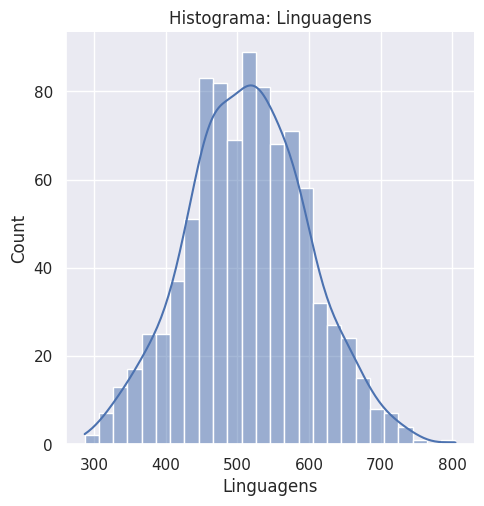

In [ ]:
plt.rcParams['figure.figsize'] = [8, 10]
sns.set_theme()

# create distplots
for disciplina in dados:
    plt.figure()
    sns.displot(data = dados , x = disciplina, kde= True, binwidth=20)
    plt.title("Histograma: "+disciplina)

In [ ]:
for disciplina in dados:

  # Calcular a assimetria para uma determinada coluna (por exemplo, 'Redação')
  assimetria = skew(dados[disciplina].dropna())

  # Imprimir o valor da assimetria
  print(f"{disciplina}:", assimetria)

Redação: 0.06520398927674331
Linguagens: 0.07519204139438847


Ambas as disciplinas de Redação e Linguagens apresentam uma ligeira inclinação para a direita (assimetria positiva). Isso sugere que a maioria dos alunos obteve notas semelhantes, mas há alguns casos com notas mais altas que estão inclinando levemente a distribuição para a direita.

Essa observação é confirmada pela medida de assimetria de Pearson, que indica a inclinação da distribuição dos dados em relação à média. Tanto para Redação (0,065) quanto para Linguagens (0,075), os valores de assimetria são próximos de 0, portanto há uma distribuição de notas relativamente equilibrada em torno da média.

## 7. Agora, coloque um range fixo de 0 até 1000. Você ainda tem a mesma opinião quanto à simetria? [plt.hist(dado, bins=_, range=[0,1000])

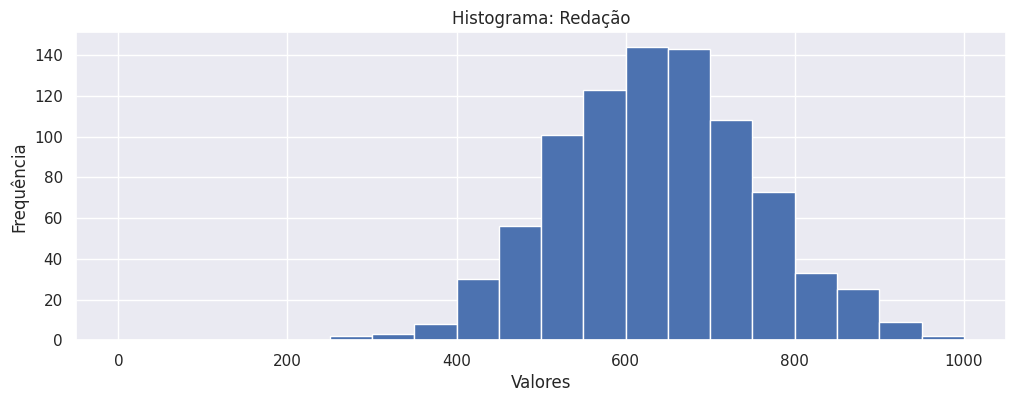

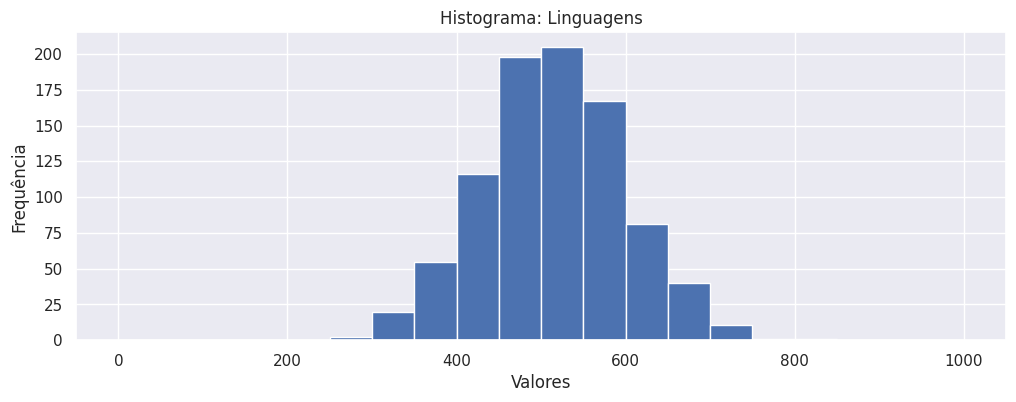

In [ ]:
for disciplina in dados:
  plt.figure(figsize = (12, 4))
  plt.hist(dados[disciplina], bins=20, range=[0,1000])
  plt.title(f'Histograma: {disciplina}')
  plt.xlabel('Valores')
  plt.ylabel('Frequência')
  plt.show()

<Figure size 800x1000 with 0 Axes>

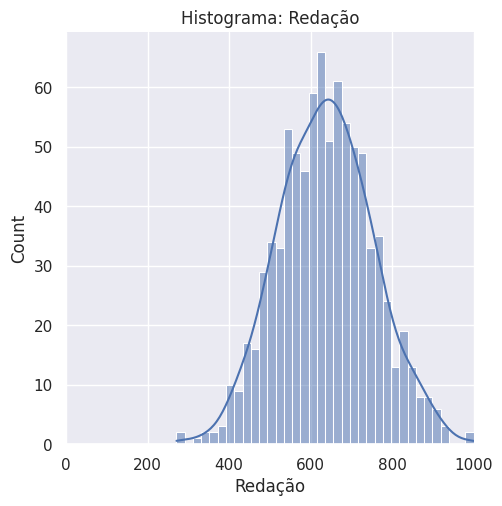

<Figure size 800x1000 with 0 Axes>

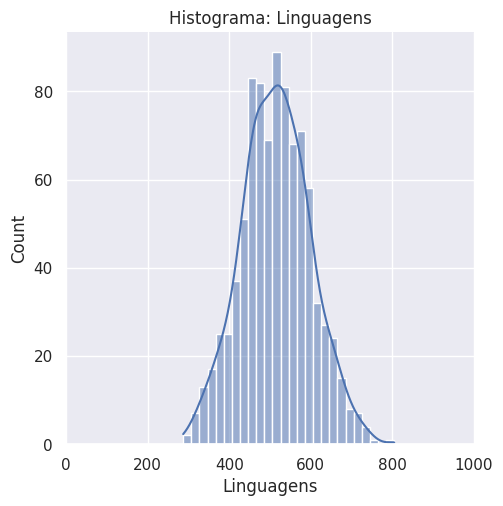

In [ ]:
plt.rcParams['figure.figsize'] = [8, 10]
sns.set_theme()

# create distplots
for disciplina in dados:
    plt.figure()
    sns.displot(data = dados , x = disciplina, kde= True, binwidth=20)
    plt.title("Histograma: "+disciplina)
    plt.xlim(0, 1000)

Sim, a distribuição ds notas parecere relativamente equilibrada em torno da média

## 8. Faça um boxplot do quartil das disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.

In [ ]:
disciplinas_selecionadas = df_enem[['Ciências da natureza', 'Redação']]

In [ ]:
# função de outliers método IQR
def find_outlier_iqr(dataset, colname):
    q25, q75 = np.quantile(dataset[colname].dropna(), 0.25), np.quantile(dataset[colname].dropna(), 0.75)
    # calcula  IQR
    iqr = q75 - q25
    # calcula outlier cutoff
    cut_off = iqr * 1.5
    # calcula margens inferiores, lower e superiores upper
    lower, upper = q25 - cut_off, q75 + cut_off
    print(' IQR é ',iqr)
    #print('Valor minimo', lower)
    #print('Valor maximo', upper)
    outliers = []

    for i in dataset[colname].values:
      if((i > upper)or(i < lower)):
        outliers.append(i)
    print(f'O numero de outliers em {colname} encontrado foi de', len(outliers))
    return lower, upper, outliers

### Verificando valores nulos

In [ ]:
df_enem.isna().sum()

Linguagens              103
Ciências humanas         64
Ciências da natureza    176
Matemática               76
Redação                 140
Sexo                      0
dtype: int64

### Mantendo os valores nulos

In [ ]:
# Selecionando as disciplinas de Ciências da Natureza e Redação considerando os valores nulos
dados_nulos = disciplinas_selecionadas

In [ ]:
dados_nulos.describe()

,Ciências da natureza,Redação
count,824.000000,860.000000
mean,499.315583,637.783532
std,78.760404,115.339972
min,314.400000,270.839965
25%,444.709076,556.468366
50%,500.479263,635.273973
75%,548.751678,715.989868
max,802.004568,1000.000000


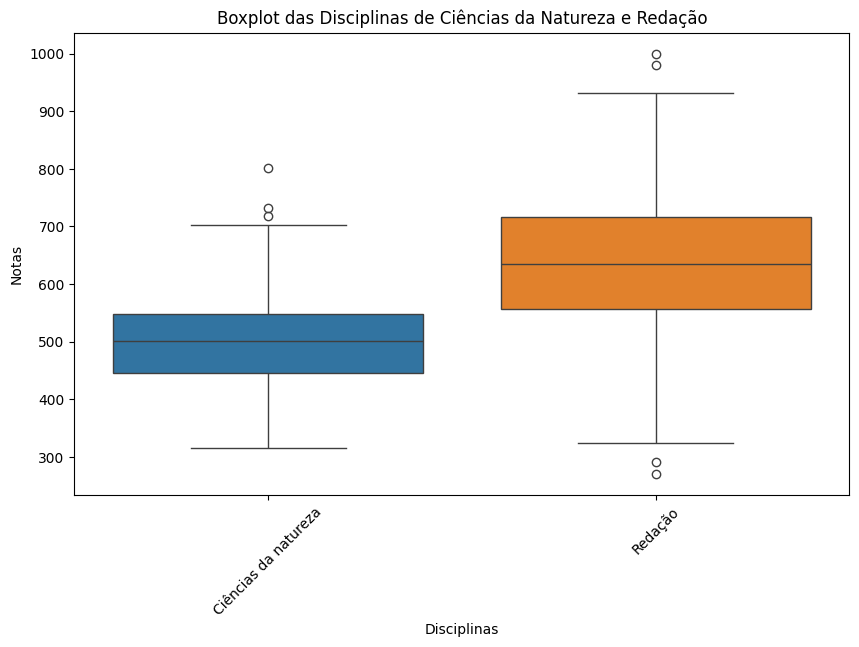

In [ ]:
# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados_nulos)
plt.title('Boxplot das Disciplinas de Ciências da Natureza e Redação')
plt.xlabel('Disciplinas')
plt.ylabel('Notas')
plt.xticks(rotation=45)  # Rotacionando os rótulos do eixo x para melhor visualização
plt.show()

 IQR é  104.04260217492504
O numero de outliers em Ciências da natureza encontrado foi de 3
 IQR é  159.52150290787495
O numero de outliers em Redação encontrado foi de 4


<Figure size 1000x600 with 0 Axes>

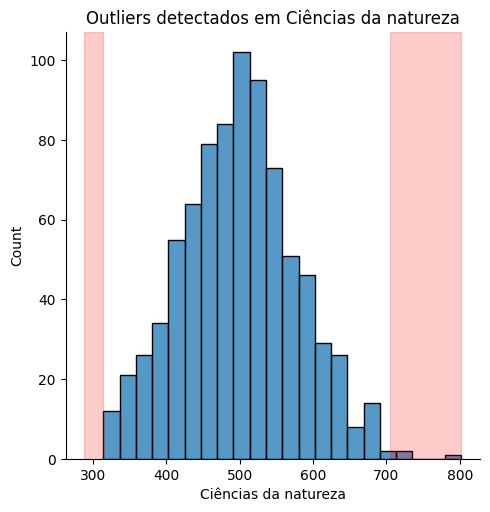

<Figure size 1000x600 with 0 Axes>

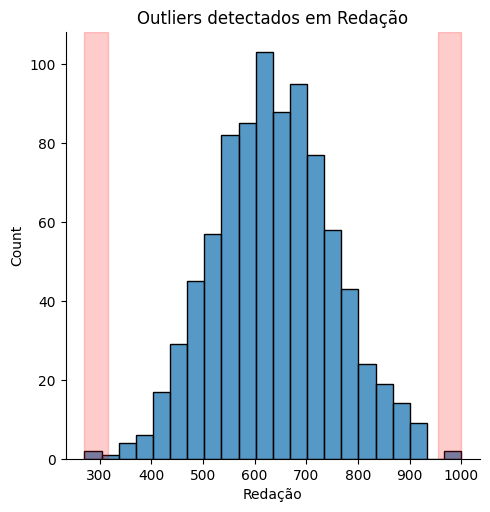

In [ ]:
# aplicando a função do método IQR
for disciplinas in dados_nulos:
  lower, upper, out =  find_outlier_iqr(dados_nulos, disciplinas)
  if (len(out) > 0):
    plt.figure(figsize = (10,6))
    sns.displot(dados_nulos[disciplinas], kde=False)
    plt.axvspan(xmin = lower,xmax= dados_nulos[disciplinas].min(),alpha=0.2, color='red')
    plt.axvspan(xmin = upper,xmax= dados_nulos[disciplinas].max(),alpha=0.2, color='red')
    plt.title("Outliers detectados em {}".format(disciplinas))

In [ ]:
def iqr_simples(value):
  return value.quantile(0.75) - value.quantile(0.25)

iqr_simples(dados_nulos)

Ciências da natureza    104.042602
Redação                 159.521503
dtype: float64

Considerando os valores nulos, na função _**'find_outlier_iqr'**_ foi preciso usar a função _**'dropna()'**_ para conseguir calcular os quatis. Mas com a analise do boxplot e calculando o IQR podemos inferir que:

- Ciências da Natureza
  - Outliers: 3
  - IQR = 104.04
- Redação
  - Outliers: 4
  - IQR = 159.52

### Ignorando os valores nulos

In [ ]:
# Selecionando as disciplinas de Ciências da Natureza e Redação
dados_nao_nulos = df_enem[['Ciências da natureza', 'Redação']].dropna()

In [ ]:
dados_nao_nulos.describe()

,Ciências da natureza,Redação
count,706.000000,706.000000
mean,501.818493,637.914426
std,79.305921,114.269820
min,314.400000,290.308608
25%,447.197356,557.217963
50%,502.935209,635.899778
75%,552.909390,712.219595
max,802.004568,981.016553


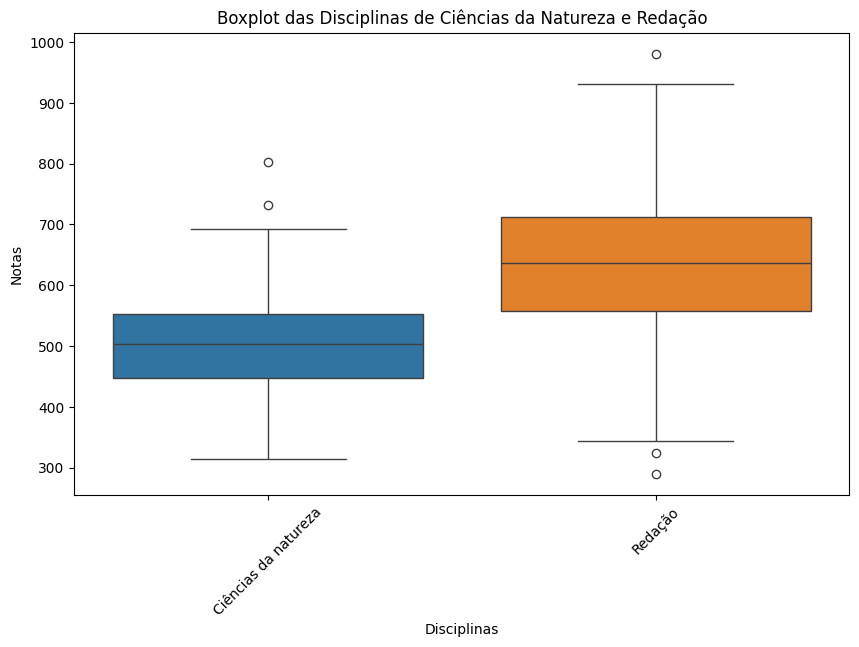

In [ ]:
# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados_nao_nulos)
plt.title('Boxplot das Disciplinas de Ciências da Natureza e Redação')
plt.xlabel('Disciplinas')
plt.ylabel('Notas')
plt.xticks(rotation=45)  # Rotacionando os rótulos do eixo x para melhor visualização
plt.show()

 IQR é  105.71203439857504
O numero de outliers em Ciências da natureza encontrado foi de 2
 IQR é  155.0016325121751
O numero de outliers em Redação encontrado foi de 3


<Figure size 1000x600 with 0 Axes>

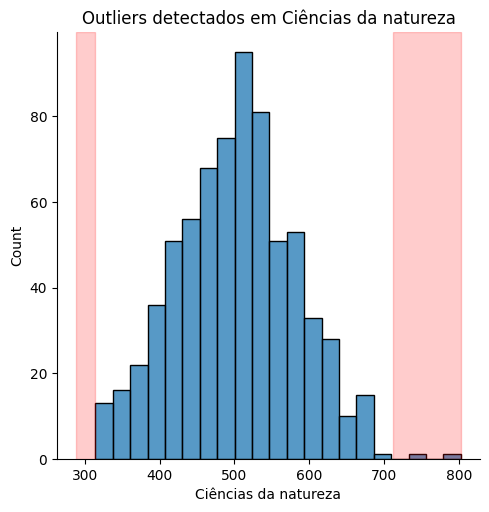

<Figure size 1000x600 with 0 Axes>

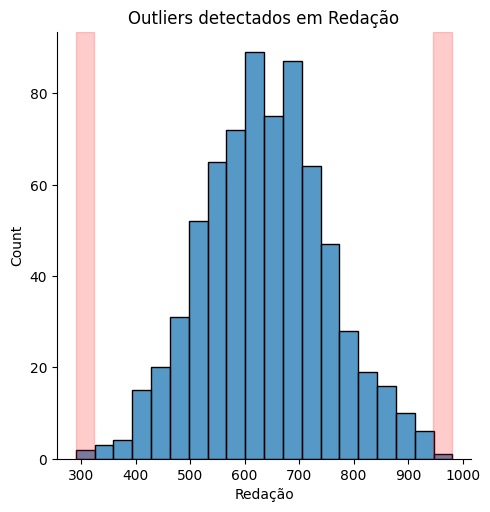

In [ ]:
# aplicando a função do método IQR
for disciplinas in dados_nao_nulos:
  lower, upper, out =  find_outlier_iqr(dados_nao_nulos, disciplinas)
  if (len(out) > 0):
    plt.figure(figsize = (10,6))
    sns.displot(dados_nao_nulos[disciplinas], kde=False)
    plt.axvspan(xmin = lower,xmax= dados_nao_nulos[disciplinas].min(),alpha=0.2, color='red')
    plt.axvspan(xmin = upper,xmax= dados_nao_nulos[disciplinas].max(),alpha=0.2, color='red')
    plt.title("Outliers detectados em {}".format(disciplinas))

In [ ]:
iqr_simples(dados_nao_nulos)

Ciências da natureza    105.712034
Redação                 155.001633
dtype: float64

Ignorando os valores nulos, o número de outliers observados no boxplot e o calculado atraves do metodo IQR coincidiram:
- Ciências da natureza:
  - Outliers: 2
  - IQR: 105.71
- Redação:
  - Outliers: 3
  - IQR: 155.00

A dispersão dos dados em torno da mediana é maior na disciplina de Redação do que na disciplina de Ciências da Natureza. Em outras palavras, os valores das notas dos alunos na disciplina de Redação tendem a variar mais do que na disciplina de Ciências da Natureza, conforme indicado pelo valor mais alto do IQR na disciplina de Redação.

### Substituindo os valores nulos

In [ ]:
#calcular a mediana das displinas
disciplinas_selecionadas_mediana = disciplinas_selecionadas.median()

#substituir os valores ausentes pela mediana
dados_preenchidos = disciplinas_selecionadas.fillna(disciplinas_selecionadas_mediana)

In [ ]:
dados_preenchidos.describe()

,Ciências da natureza,Redação
count,1000.000000,1000.000000
mean,499.520391,637.432194
std,71.488051,106.956723
min,314.400000,270.839965
25%,459.456673,571.697962
50%,500.479263,635.273973
75%,536.724816,699.972897
max,802.004568,1000.000000


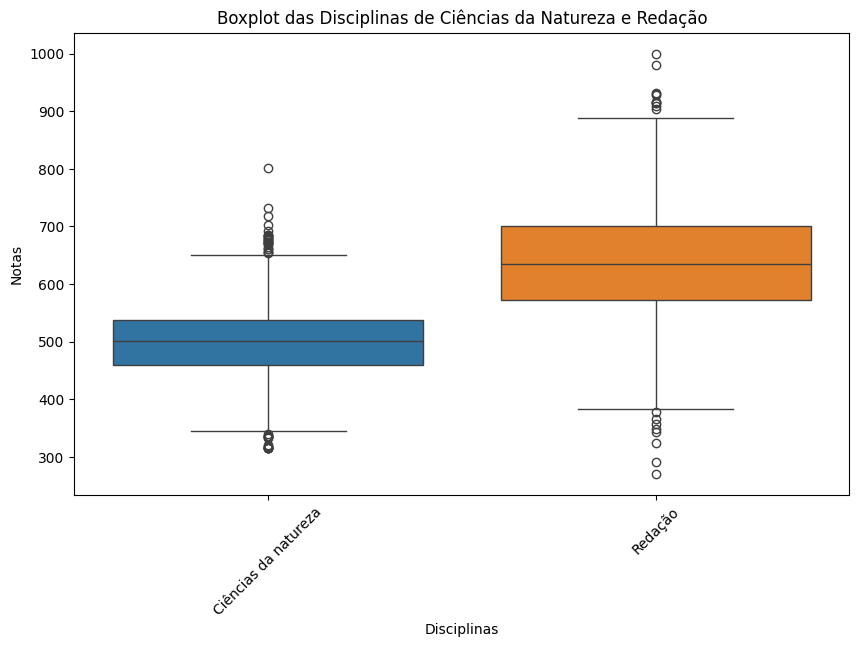

In [ ]:
# Criando o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=dados_preenchidos)
plt.title('Boxplot das Disciplinas de Ciências da Natureza e Redação')
plt.xlabel('Disciplinas')
plt.ylabel('Notas')
plt.xticks(rotation=45)  # Rotacionando os rótulos do eixo x para melhor visualização
plt.show()

 IQR é  77.26814280032505
O numero de outliers em Ciências da natureza encontrado foi de 41
 IQR é  128.274934279975
O numero de outliers em Redação encontrado foi de 19


<Figure size 1000x600 with 0 Axes>

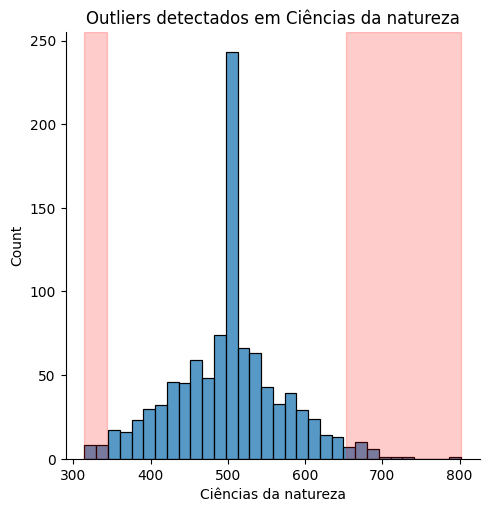

<Figure size 1000x600 with 0 Axes>

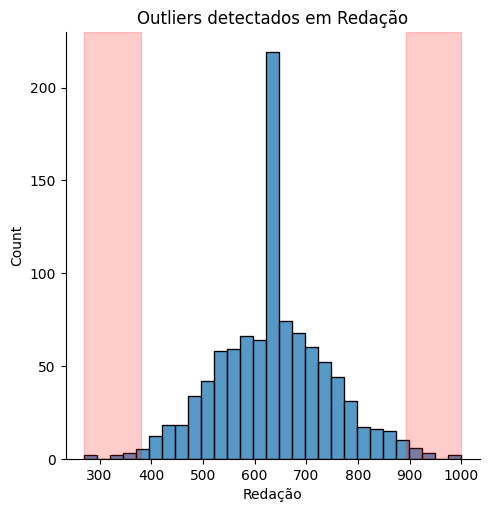

In [ ]:
# aplicando a função do método IQR
for disciplinas in dados_preenchidos:
  lower, upper, out =  find_outlier_iqr(dados_preenchidos, disciplinas)
  if (len(out) > 0):
    plt.figure(figsize = (10,6))
    sns.displot(dados_preenchidos[disciplinas], kde=False)
    plt.axvspan(xmin = lower,xmax= dados_preenchidos[disciplinas].min(),alpha=0.2, color='red')
    plt.axvspan(xmin = upper,xmax= dados_preenchidos[disciplinas].max(),alpha=0.2, color='red')
    plt.title("Outliers detectados em {}".format(disciplinas))

In [ ]:
iqr_simples(dados_preenchidos)

Ciências da natureza     77.268143
Redação                 128.274934
dtype: float64

Quando os valores nulos são substituídos pela mediana, houve um aumento significativo no número de outliers e diminuição dos valores de IQR

- Ciências da Natureza:
  - Outliers: 41
  - IQR: 77.27

- Redação:
  - Outliers: 19
  - IQR: 128.27


A substituição dos valores nulos pela mediana teve um impacto na distribuição dos dados, resultando em uma maior dispersão ao redor da medida central.

O aumento dos outliers sugere que há mais pontos de dados que são considerados extremos em relação à distribuição dos dados, indicando uma maior variabilidade ou dispersão dos dados.

A diminuição do IQR significa que os valores dos quartis 1 e 3 estão mais próximos um do outro, indicando que os dados estão menos dispersos ao redor da mediana.



In [ ]:
# Ciencias da Natureza
pd.DataFrame({
    'Nulos (in)': [3, 104.4],
    'Nulos (out)': [2, 105.71],
    'Nulos (median)': [41,77.27]
}, index=['Outliers', 'IQR'])


,Nulos (in),Nulos (out),Nulos (median)
Outliers,3.0,2.00,41.00
IQR,104.4,105.71,77.27


In [ ]:
# Redação
pd.DataFrame({
    'Nulos (in)': [4, 159.52],
    'Nulos (out)': [3, 155.00],
    'Nulos (median)': [19,128.27]
}, index=['Outliers', 'IQR'])

,Nulos (in),Nulos (out),Nulos (median)
Outliers,4.00,3.0,19.00
IQR,159.52,155.0,128.27


## 9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (Considere significativamente um valor acima de 5%)

In [ ]:
# criando uma coluna com a somatoria das notas de cada aluno
df_enem['Total'] = df_enem.select_dtypes(include=['number']).sum(axis=1)
df_enem

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Total
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem,2661.316989
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher,2155.499205
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem,2915.625834
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem,2714.032069
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem,2747.902665
...,...,...,...,...,...,...,...
995,455.479216,557.756326,511.347833,510.358766,NaN,Homem,2034.942141
996,457.755594,444.616952,542.028624,419.689692,715.984249,Mulher,2580.075110
997,551.173161,568.769704,508.034658,NaN,798.408655,Homem,2426.386178
998,495.804002,522.125008,414.167228,451.696456,593.392939,Homem,2477.185633


In [ ]:
# media considerando os nulos
media_nulo = df_enem.mean()
media_nulo

<ipython-input-45-235b580f16ff>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media_nulo = df_enem.mean()


Linguagens               514.524809
Ciências humanas         527.042281
Ciências da natureza     499.315583
Matemática               535.965660
Redação                  637.783532
Total                   2410.002477
dtype: float64

In [ ]:
# media considerando os não nulos
media_sem_nulo = df_enem.dropna().mean()
media_sem_nulo

<ipython-input-46-08f2f9d9bb09>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media_sem_nulo = df_enem.dropna().mean()


Linguagens               517.467162
Ciências humanas         528.351454
Ciências da natureza     502.142101
Matemática               537.172480
Redação                  641.193123
Total                   2726.326320
dtype: float64

In [ ]:
# calculo da variação da média
def variacao_da_media(a,b):
  vdm = ((b - a) * 100)/a
  return vdm

In [ ]:
# Calculando a variação percentual entre as duas médias
var_percentual = variacao_da_media(media_nulo, media_sem_nulo)

In [ ]:
pd.DataFrame({
    'Media c/ NaN': media_nulo,
    'Media s/ Nan': media_sem_nulo,
    'Variacao %': var_percentual
})

,Media c/ NaN,Media s/ Nan,Variacao %
Linguagens,514.524809,517.467162,0.571858
Ciências humanas,527.042281,528.351454,0.248400
Ciências da natureza,499.315583,502.142101,0.566078
Matemática,535.965660,537.172480,0.225167
Redação,637.783532,641.193123,0.534600
Total,2410.002477,2726.326320,13.125457


Sim. A remoção dos outliers aumentou a média em 13%, portanto pode ser considerando como uma alteração significativa.

## 10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [ ]:
media_geral_original = df_enem.select_dtypes(include=['number']).sum(axis=1).mean()
std_geral_original = df_enem.select_dtypes(include=['number']).sum(axis=1).std()

### 10.1 Media

In [ ]:
# calculo da media
media_q10 = df_enem.mean()

# substituindo NaN pela media
df_media_q10 = df_enem.fillna(media_q10)

# armazenar a soma total de cada aluno
df_media_q10['Total'] = df_media_q10.select_dtypes(include=['number']).sum(axis=1)

# calculo da media geral
media_geral1 = df_media_q10['Total'].mean()

# desvia padrão
std_geral1 = df_media_q10['Total'].std()

<ipython-input-51-d26aca677105>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media_q10 = df_enem.mean()


### 10.2 Moda

In [ ]:
# calculo da moda
moda_q10 = df_enem.mode()

# substituindo NaN pela moda
df_moda_q10 = df_enem.fillna(moda_q10)

# armazenar a soma total de cada aluno
df_moda_q10['Total'] = df_moda_q10.select_dtypes(include=['number']).sum(axis=1)

# calculo da media geral
media_geral2 = df_moda_q10['Total'].mean()

# desvia padrão
std_geral2 = df_moda_q10['Total'].std()

### 10.3 Mediana

In [ ]:
# calculo da media
mediana_q10 = df_enem.median()

# substituindo NaN pela media
df_mediana_q10 = df_enem.fillna(mediana_q10)

# armazenar a soma total de cada aluno
df_mediana_q10['Total'] = df_mediana_q10.select_dtypes(include=['number']).sum(axis=1)

# calculo da media geral
media_geral3 = df_mediana_q10['Total'].mean()

# desvia padrão
std_geral3 = df_mediana_q10['Total'].std()

<ipython-input-53-3b18bcd1ee58>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mediana_q10 = df_enem.median()


### Variação entre a média e o desvio padrão dos dados originais, com os valores encontrados após a substituição

In [ ]:
# Variação percentual da média geral para cada substituição
var_media_q10 = ((media_geral1 - media_geral_original) / media_geral_original) * 100
var_media_q10_moda = ((media_geral2 - media_geral_original) / media_geral_original) * 100
var_media_q10_mediana = ((media_geral3 - media_geral_original) / media_geral_original) * 100

# Variação percentual do desvio padrão para cada substituição
var_std_q10 = ((std_geral1 - std_geral_original) / std_geral_original) * 100
var_std_q10_moda = ((std_geral2 - std_geral_original) / std_geral_original) * 100
var_std_q10_mediana = ((std_geral3 - std_geral_original) / std_geral_original) * 100

Visualizando os resultados

In [ ]:
table_comparativa = {
    'Original': [media_geral_original, std_geral_original],
    'Media': [media_geral1, std_geral1],
    'Moda': [media_geral2, std_geral2],
    'Mediana': [media_geral3, std_geral3]
}

pd.DataFrame(table_comparativa, index=['Média', 'Std'])

,Original,Media,Moda,Mediana
Média,4820.004953,5124.634342,4894.018927,5124.173425
Std,865.737951,542.661229,790.647421,543.204645


In [ ]:
# Comparando as variações percentuais
print("Variação percentual da média geral:")
print("Média:", var_media_q10)
print("Moda:", var_media_q10_moda)
print("Mediana:", var_media_q10_mediana)

print("\nVariação percentual do desvio padrão:")
print("Média:", var_std_q10)
print("Moda:", var_std_q10_moda)
print("Mediana:", var_std_q10_mediana)

Variação percentual da média geral:
Média: 6.320105301335261
Moda: 1.5355580523819312
Mediana: 6.310542736144704

Variação percentual do desvio padrão:
Média: -37.318073184200564
Moda: -8.673586479194348
Mediana: -37.25530408585821


A média e a mediana resultaram em variações semelhantes na média geral, enquanto a moda teve uma variação menor. Isso sugere que, ao considerar a substituição de valores nulos, a moda pode ser uma escolha mais estável em termos de impacto na média e no desvio padrão gerais.

- Média:
  - Original: 4820.004953
  - Moda:	4894.018927

- std:
  - Original: 865.737951
  - Moda:	790.647421

